In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error


car_data = pd.read_csv("Car_Data_v2.csv")

In [5]:
print(car_data.head())

      Price   Doors  Fuel Efficiency  Miles
0  $21,495   4 door               22  53969
1  $20,300   4 door               17  72635
2  $20,300   4 door               17  73465
3  $20,300   4 door               17  71190
4  $20,495   4 door               25  57762


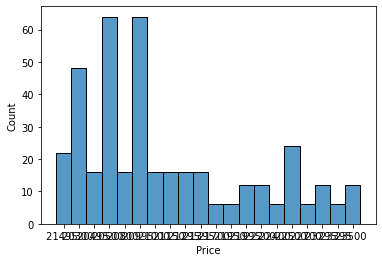

In [30]:
sns.histplot(x="Price", data = car_data)
plt.show()

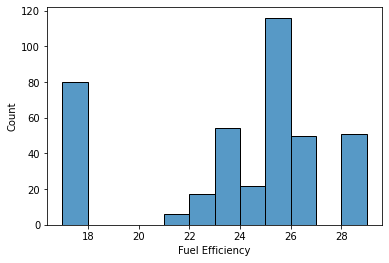

In [12]:
sns.histplot(x="Fuel Efficiency", data = car_data)
plt.show()

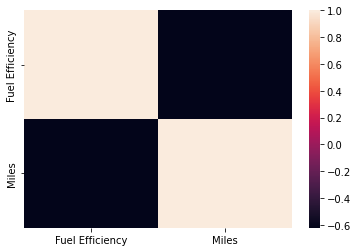

In [31]:
sns.heatmap(car_data.corr())
plt.show()

In [22]:
car_data["Doors"] = car_data["Doors"].str.replace("door", "")

In [23]:
car_data["Doors"]

0      4 
1      4 
2      4 
3      4 
4      4 
       ..
391    4 
392    4 
393    4 
394    4 
395    4 
Name: Doors, Length: 396, dtype: object

In [24]:
car_data

,Price,Doors,Fuel Efficiency,Miles
0,"$21,495",4,22,53969
1,"$20,300",4,17,72635
2,"$20,300",4,17,73465
3,"$20,300",4,17,71190
4,"$20,495",4,25,57762
...,...,...,...,...
391,"$23,295",4,26,60480
392,"$23,295",4,26,44820
393,"$23,395",4,25,50115
394,"$23,500",4,21,65458


In [27]:
car_data["Price"] = car_data["Price"].str.replace("$", "")
car_data

#removing the "$"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


,Price,Doors,Fuel Efficiency,Miles
0,"21,495",4,22,53969
1,"20,300",4,17,72635
2,"20,300",4,17,73465
3,"20,300",4,17,71190
4,"20,495",4,25,57762
...,...,...,...,...
391,"23,295",4,26,60480
392,"23,295",4,26,44820
393,"23,395",4,25,50115
394,"23,500",4,21,65458


In [54]:
# car_data["Price"] = car_data["Price"].str.replace(",", "")

#casting the following columns to integers
car_data["Price"] = car_data["Price"].astype(object).astype(int)
car_data["Doors"] = car_data["Doors"].astype(object).astype(int)
print(car_data.dtypes)

Price              int64
Doors              int64
Fuel Efficiency    int64
Miles              int64
Door               int64
dtype: object


In [56]:
X = car_data.drop(["Price"], axis =1)
Y = car_data["Price"]
validation_size = .20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
    test_size=validation_size, random_state=seed)
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'


# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))


# evaluate each model in turn
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=seed, shuffle= True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = f"{name}, {cv_results.mean()}, {cv_results.std()}"
  print(msg) 


LR, -574698.504717034, 214644.17186274548
LASSO, -574699.123270167, 214660.16720802124
EN, -574650.4365630804, 215028.47807159557
KNN, -41196.264314516135, 27190.483890499283
CART, 0.0, 0.0
SVR, -876306.1023280912, 259737.1568647611
